In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-most-populated-city-2022-to-2023/World City Populations 2023.csv


In [2]:
df=pd.read_csv("/kaggle/input/world-most-populated-city-2022-to-2023/World City Populations 2023.csv")

In [3]:
df.shape

(778, 8)

In [4]:
df.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN


In [5]:
df.tail()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
773,752916,734805,Tongling,China,Asia,0.0246,774,NaN
774,752744,729109,Tirupati,India,Asia,0.0324,775,NaN
775,751679,733917,Wuzhou,China,Asia,0.0242,776,NaN
776,750102,723114,Yuxi,China,Asia,0.0373,777,NaN
777,750097,733643,Suining Sichuan,China,Asia,0.0224,778,NaN


**EDA (Exploratory Data Analysis)**

In [6]:
##Let's drop the NaN columns
new_df=df.drop(columns="Unnamed: 7")

In [7]:
new_df.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1
1,32941308,32065760,Delhi,India,Asia,0.0273,2
2,29210808,28516904,Shanghai,China,Asia,0.0243,3
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5


In [8]:
new_df.isnull().sum()

Pop2023       0
Pop2022       0
City          0
Country       0
Continent     0
growthRate    0
rank          0
dtype: int64

In [9]:
new_df.duplicated().sum()

0

In [10]:
new_df.sample(10)

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank
287,1797516,1794532,Warsaw,Poland,Europe,0.0017,288
563,1030498,1000477,Ilorin,Nigeria,Africa,0.0300,564
539,1077929,1034917,Sekondi Takoradi,Ghana,Africa,0.0416,540
270,1928661,1915134,West Yorkshire,United Kingdom,Europe,0.0071,271
738,792620,778087,Amravati,India,Asia,0.0187,739
223,2318850,2296368,Taoyuan,Taiwan,Asia,0.0098,224
568,1020399,980589,Guiping,China,Asia,0.0406,569
631,936997,898864,Liling,China,Asia,0.0424,632
306,1695060,1661439,Jamshedpur,India,Asia,0.0202,307
446,1254160,1223886,Puning,China,Asia,0.0247,447


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pop2023     778 non-null    int64  
 1   Pop2022     778 non-null    int64  
 2   City        778 non-null    object 
 3   Country     778 non-null    object 
 4   Continent   778 non-null    object 
 5   growthRate  778 non-null    float64
 6   rank        778 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 42.7+ KB


In [12]:
new_df.describe()

,Pop2023,Pop2022,growthRate,rank
count,7.780000e+02,7.780000e+02,778.000000,778.000000
mean,2.658927e+06,2.607826e+06,0.020758,389.500000
std,3.700349e+06,3.638665e+06,0.013135,224.733546
min,7.500970e+05,7.231140e+05,-0.034800,1.000000
25%,9.921812e+05,9.657890e+05,0.012625,195.250000
50%,1.381252e+06,1.362342e+06,0.019950,389.500000
75%,2.607130e+06,2.548158e+06,0.028675,583.750000
max,3.719410e+07,3.727400e+07,0.061100,778.000000


In [13]:
##importing required library
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
new_df.corr()

/tmp/ipykernel_20/4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,Pop2023,Pop2022,growthRate,rank
Pop2023,1.000000,0.999884,-0.054863,-0.618718
Pop2022,0.999884,1.000000,-0.063579,-0.617801
growthRate,-0.054863,-0.063579,1.000000,0.071437
rank,-0.618718,-0.617801,0.071437,1.000000


In [15]:
new_df['City'].unique()

array(['Tokyo', 'Delhi', 'Shanghai', 'Dhaka', 'Sao Paulo', 'Mexico City',
       'Cairo', 'Beijing', 'Mumbai', 'Osaka', 'Chongqing', 'Karachi',
       'Kinshasa', 'Lagos', 'Istanbul', 'Buenos Aires', 'Kolkata',
       'Manila', 'Guangzhou', 'Tianjin', 'Lahore', 'Rio de Janeiro',
       'Bangalore', 'Shenzhen', 'Moscow', 'Chennai', 'Bogota', 'Jakarta',
       'Paris', 'Lima', 'Bangkok', 'Hyderabad', 'Seoul', 'Nanjing',
       'Chengdu', 'London', 'Nagoya', 'Tehran', 'Ho Chi Minh City',
       'Luanda', 'Xi-an Shaanxi', 'Wuhan', 'Ahmedabad', 'Kuala Lumpur',
       'Hangzhou', 'Suzhou', 'Surat', 'New York City', 'Dar es Salaam',
       'Baghdad', 'Hong Kong', 'Riyadh', 'Shenyang', 'Foshan', 'Dongguan',
       'Pune', 'Santiago', 'Haerbin', 'Madrid', 'Toronto', 'Khartoum',
       'Belo Horizonte', 'Johannesburg', 'Singapore', 'Dalian', 'Qingdao',
       'Zhengzhou', 'Ji-nan Shandong', 'Barcelona', 'Abidjan', 'Yangon',
       'Alexandria', 'Saint Petersburg', 'Fukuoka', 'Addis Ababa',
     

In [16]:
new_df['City'].value_counts()

San Jose           2
Hyderabad          2
Suzhou             2
Valencia           2
Yerevan            1
                  ..
Vienna             1
Rabat              1
Quito              1
Ludhiana           1
Suining Sichuan    1
Name: City, Length: 774, dtype: int64

In [17]:
new_df['City'].value_counts().sum()

778

In [18]:
new_df['Country'].unique()

array(['Japan', 'India', 'China', 'Bangladesh', 'Brazil', 'Mexico',
       'Egypt', 'Pakistan', 'DR Congo', 'Nigeria', 'Turkey', 'Argentina',
       'Philippines', 'Russia', 'Colombia', 'Indonesia', 'France', 'Peru',
       'Thailand', 'South Korea', 'United Kingdom', 'Iran', 'Vietnam',
       'Angola', 'Malaysia', 'United States', 'Tanzania', 'Iraq',
       'Hong Kong', 'Saudi Arabia', 'Chile', 'Spain', 'Canada', 'Sudan',
       'South Africa', 'Singapore', 'Ivory Coast', 'Myanmar', 'Ethiopia',
       'Kenya', 'Australia', 'Afghanistan', 'Cameroon', 'Taiwan',
       'Israel', 'Italy', 'Morocco', 'Madagascar', 'Uganda', 'Ghana',
       'Germany', 'Dominican Republic', 'Paraguay', 'Senegal', 'Kuwait',
       'Yemen', 'Burkina Faso', 'Zambia', 'North Korea', 'Greece',
       'Ecuador', 'Guatemala', 'Ukraine', 'United Arab Emirates',
       'Portugal', 'Haiti', 'Venezuela', 'Mali', 'Algeria',
       'Republic of the Congo', 'Somalia', 'Uzbekistan', 'Syria',
       'Tunisia', 'Puerto Rico'

In [19]:
new_df['Country'].value_counts()

China        219
India         81
Mexico        28
Brazil        26
Nigeria       22
            ... 
Cuba           1
Jordan         1
Cambodia       1
Lebanon        1
Palestine      1
Name: Country, Length: 132, dtype: int64

In [20]:
new_df['Country'].value_counts().sum()

778

In [21]:
new_df['Continent'].unique()

array(['Asia', 'South America', 'North America', 'Africa', 'Europe',
       'Oceania'], dtype=object)

In [22]:
new_df['Continent'].value_counts()

Asia             466
Africa           105
Europe            77
North America     64
South America     60
Oceania            6
Name: Continent, dtype: int64

In [23]:
new_df['Continent'].value_counts().sum()

778

In [24]:
new_df['growthRate'].unique()

array([-0.0021,  0.0273,  0.0243,  0.0325,  0.0085,  0.0089,  0.0199,
        0.0203,  0.016 , -0.0024,  0.0276,  0.0235,  0.044 ,  0.0363,
        0.0135,  0.0078,  0.0131,  0.0181,  0.0229,  0.0162,  0.0323,
        0.0069,  0.0314,  0.0188,  0.0031,  0.0237,  0.0144,  0.0157,
        0.0059,  0.0145,  0.0156,  0.0253,  0.0012,  0.0285,  0.0185,
        0.0113, -0.0002,  0.0126,  0.0268,  0.038 ,  0.029 ,  0.0147,
        0.024 ,  0.0239,  0.0399,  0.0361, -0.0348,  0.0501,  0.0265,
        0.0054,  0.0191,  0.0134,  0.01  ,  0.0257,  0.0068,  0.0207,
        0.0056,  0.0093,  0.0299,  0.0087,  0.0219,  0.0249,  0.0297,
        0.0051,  0.0309,  0.0174,  0.0046, -0.0022,  0.0445,  0.015 ,
        0.0165,  0.0241,  0.0403,  0.0367,  0.0164,  0.0127,  0.0159,
        0.0232,  0.0186,  0.0329,  0.0172,  0.0223,  0.0204,  0.0293,
        0.0301,  0.0398,  0.0075,  0.0178,  0.0306,  0.0041,  0.0073,
        0.0103,  0.0063,  0.0244,  0.0102,  0.026 ,  0.0182,  0.0428,
        0.0348,  0.0

In [25]:
new_df['growthRate'].value_counts().sum()

778

/tmp/ipykernel_20/3248456509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(),mask=False,annot=True)



			Correlation metrix


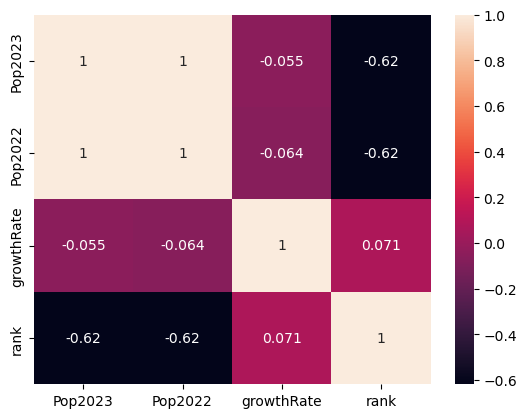

In [26]:
sns.heatmap(new_df.corr(),mask=False,annot=True)
print("\n\t\t\tCorrelation metrix")

**Top most 100 country according to papulation in 2022 WorldWide**

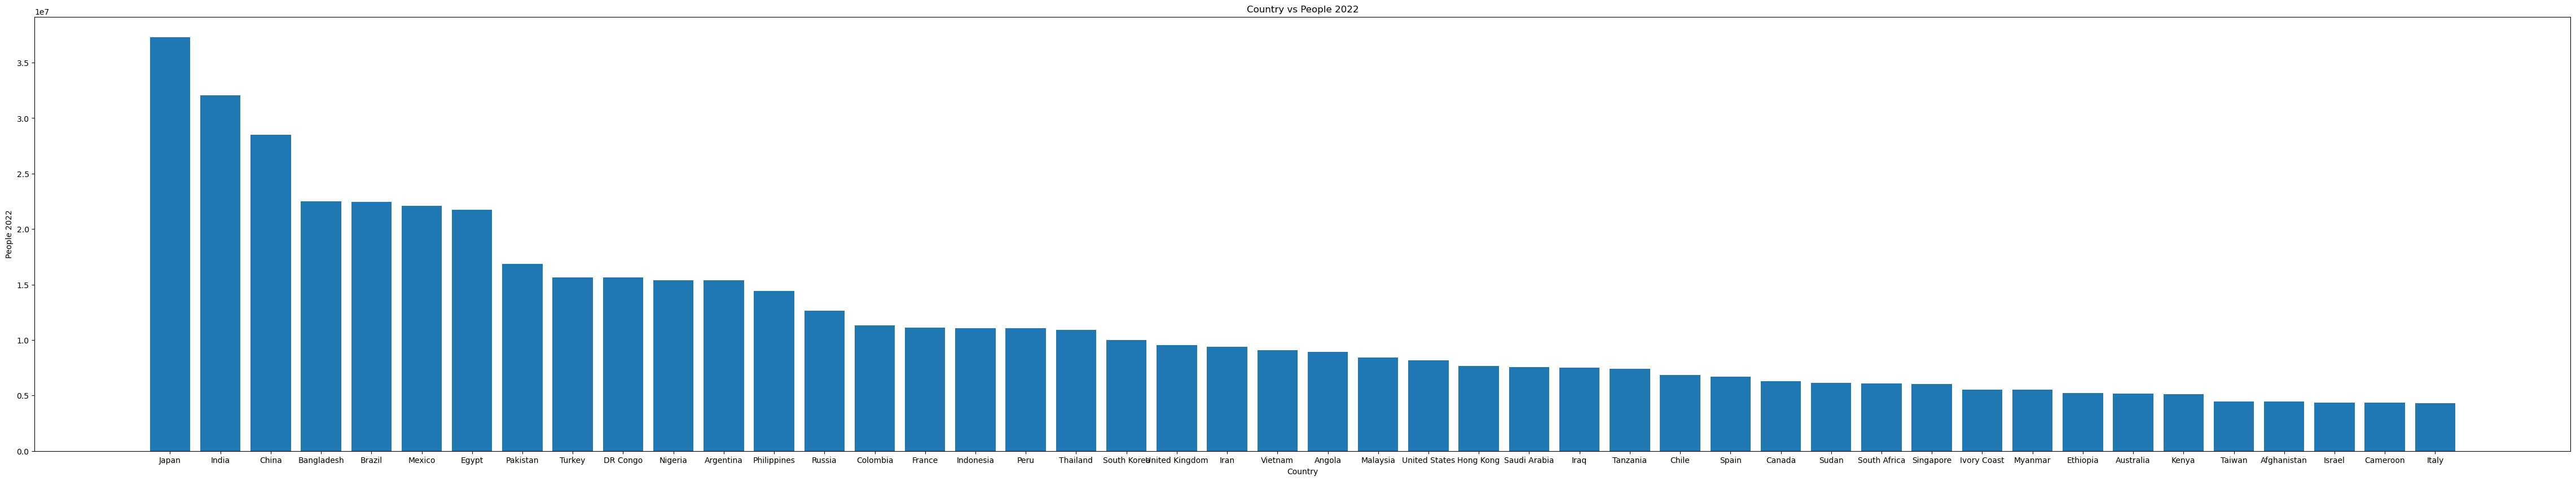

In [27]:
plt.figure(figsize=(58,10))
plt.bar(x=new_df.sort_values(by="Pop2022",ascending=False)["Country"].head(100),height=new_df.sort_values(by="Pop2022",ascending=False)["Pop2022"].head(100))
plt.xlabel("Country")
plt.ylabel("People 2022")
plt.title("Country vs People 2022")
plt.show()

**Top most 100 country according to papulation in 2023 WorldWide**

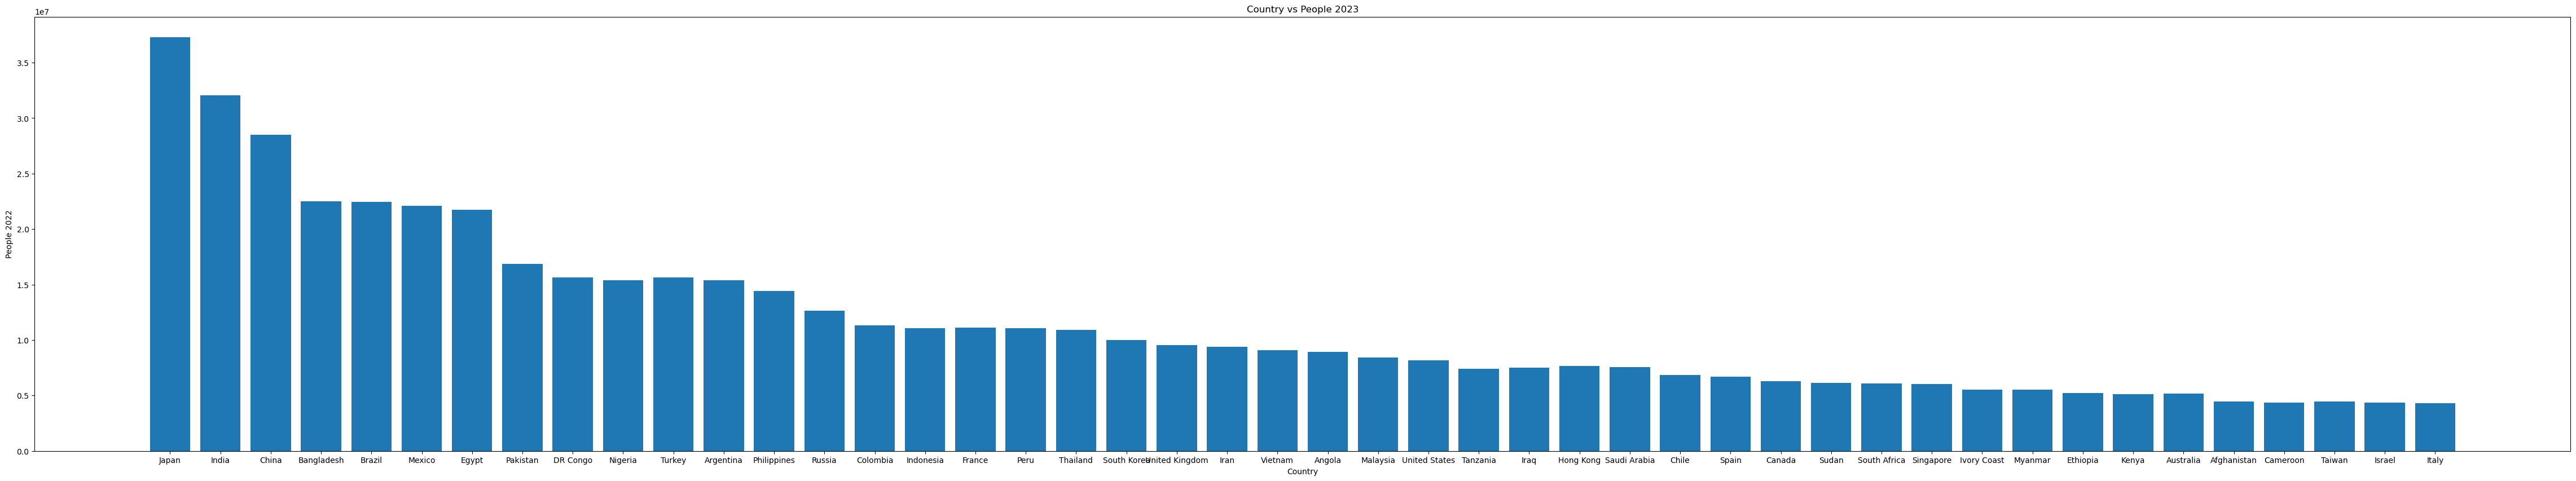

In [28]:
plt.figure(figsize=(58,10))
plt.bar(x=new_df.sort_values(by="Pop2023",ascending=False)["Country"].head(100),height=new_df.sort_values(by="Pop2023",ascending=False)["Pop2022"].head(100))
plt.xlabel("Country")
plt.ylabel("People 2022")
plt.title("Country vs People 2023")
plt.show()

<Axes: xlabel='Pop2022', ylabel='Pop2023'>

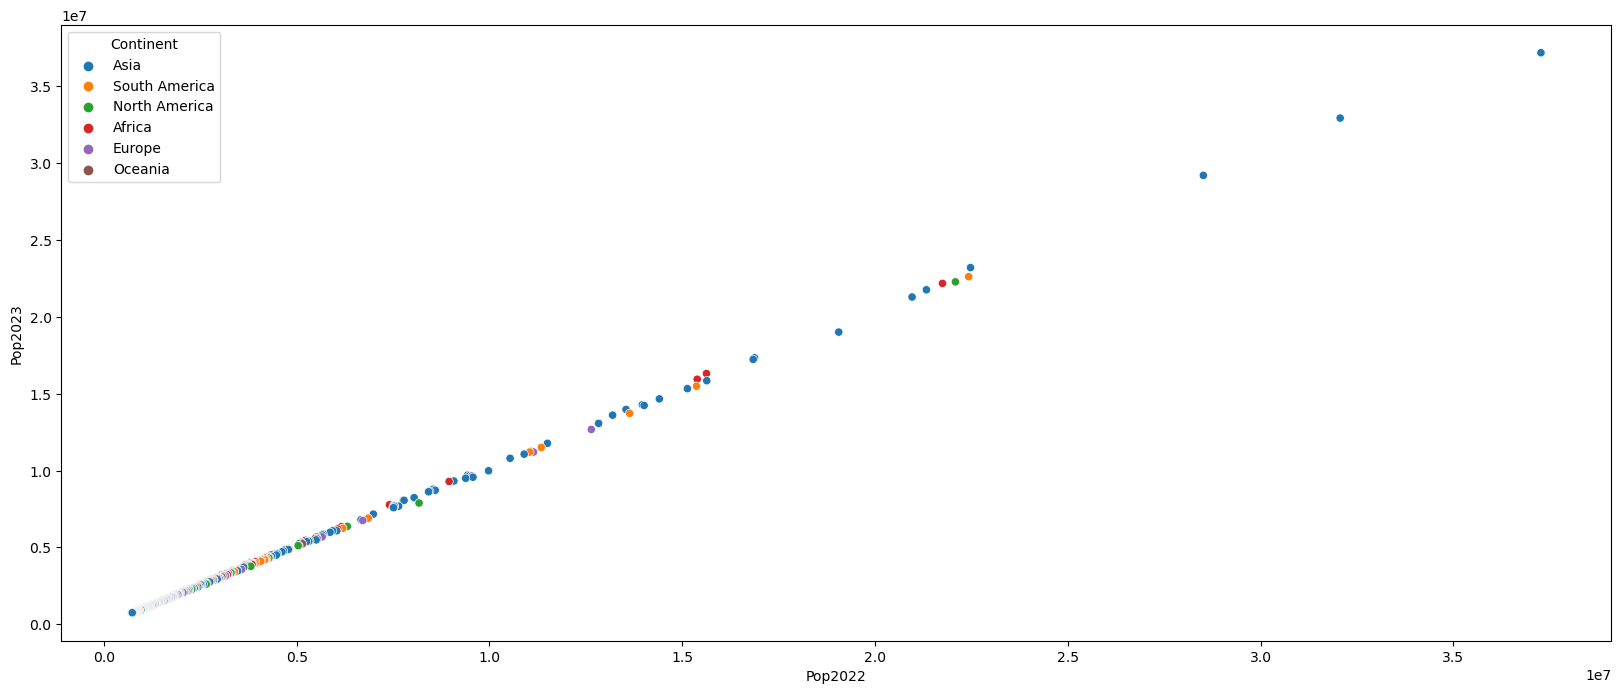

In [29]:
plt.figure(figsize=(20,8))
sns.scatterplot(y=new_df['Pop2023'],x=new_df['Pop2022'],hue=new_df['Continent'])

<Axes: >

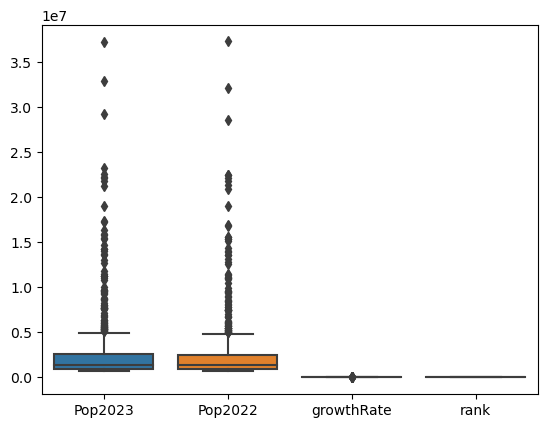

In [30]:
sns.boxplot(new_df)

				Comparsion between the Papolation of 2022 and 2023


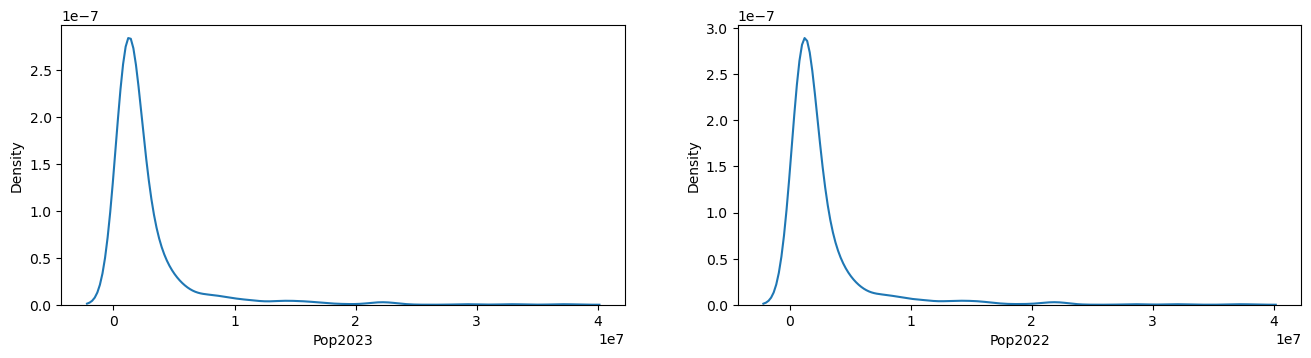

In [31]:
print("\t\t\t\tComparsion between the Papolation of 2022 and 2023")
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(new_df['Pop2023'])
plt.subplot(2,2,2)
sns.kdeplot(new_df['Pop2022'])
plt.show()

In [32]:
def bottom_show(top):
    top_df1 = df.iloc[-top:, :]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    sns.barplot(top_df1,x='City', y='Pop2022', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    sns.barplot(top_df1,x='City', y='Pop2023', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    sns.barplot(top_df1,x='City', y='growthRate', ax=axes[2])
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
    plt.suptitle("Top {} least populates cities in 2022 and in 2023\nand their growth rates".format(top), size=25)
    plt.tight_layout()
    plt.show()

In [33]:
def top_cities(top, bottom=False):
    top_df = df.iloc[:top, :]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    sns.barplot(top_df,x='City', y='Pop2022', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    sns.barplot(top_df,x='City', y='Pop2023', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    sns.barplot(top_df,x='City', y='growthRate', ax=axes[2])
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
    plt.suptitle("Top {} populates cities in 2022 and in 2023\nand their growth rates".format(top), size=25)
    plt.tight_layout()
    plt.show()
    if bottom:
        bottom_show(top)

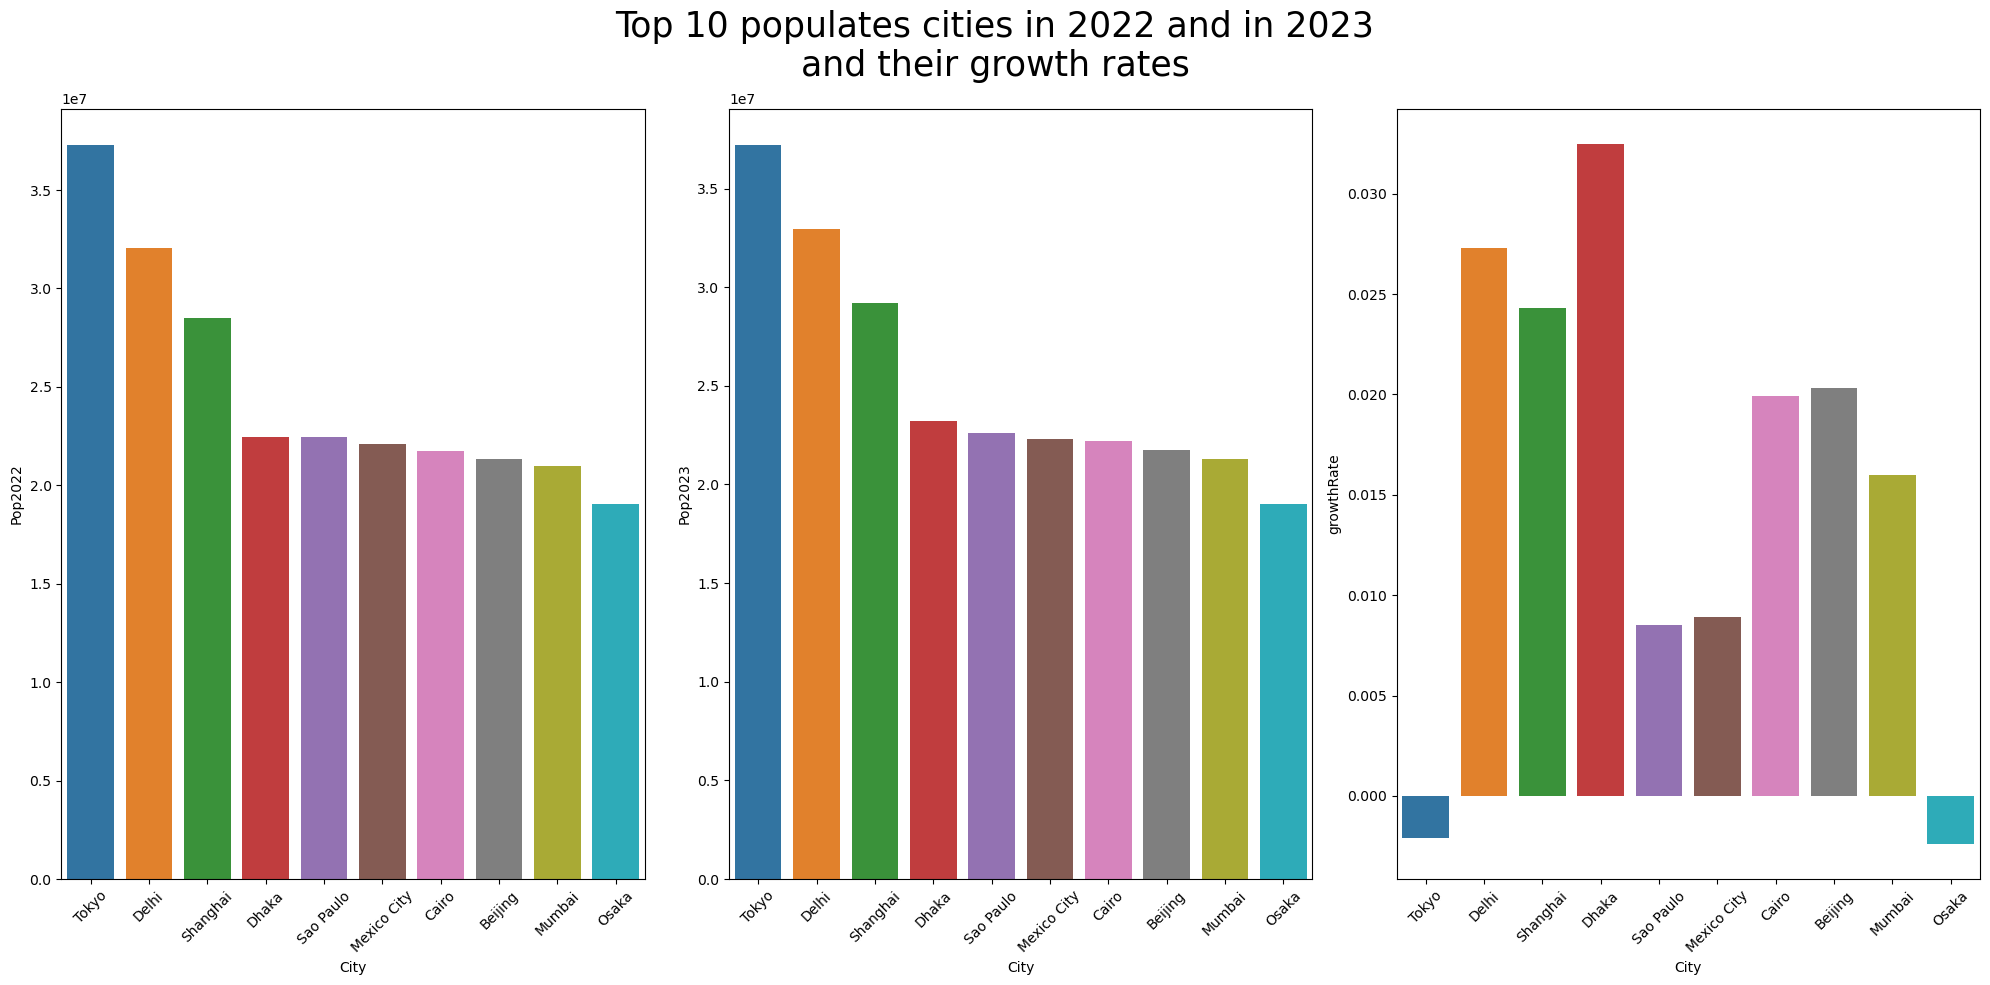

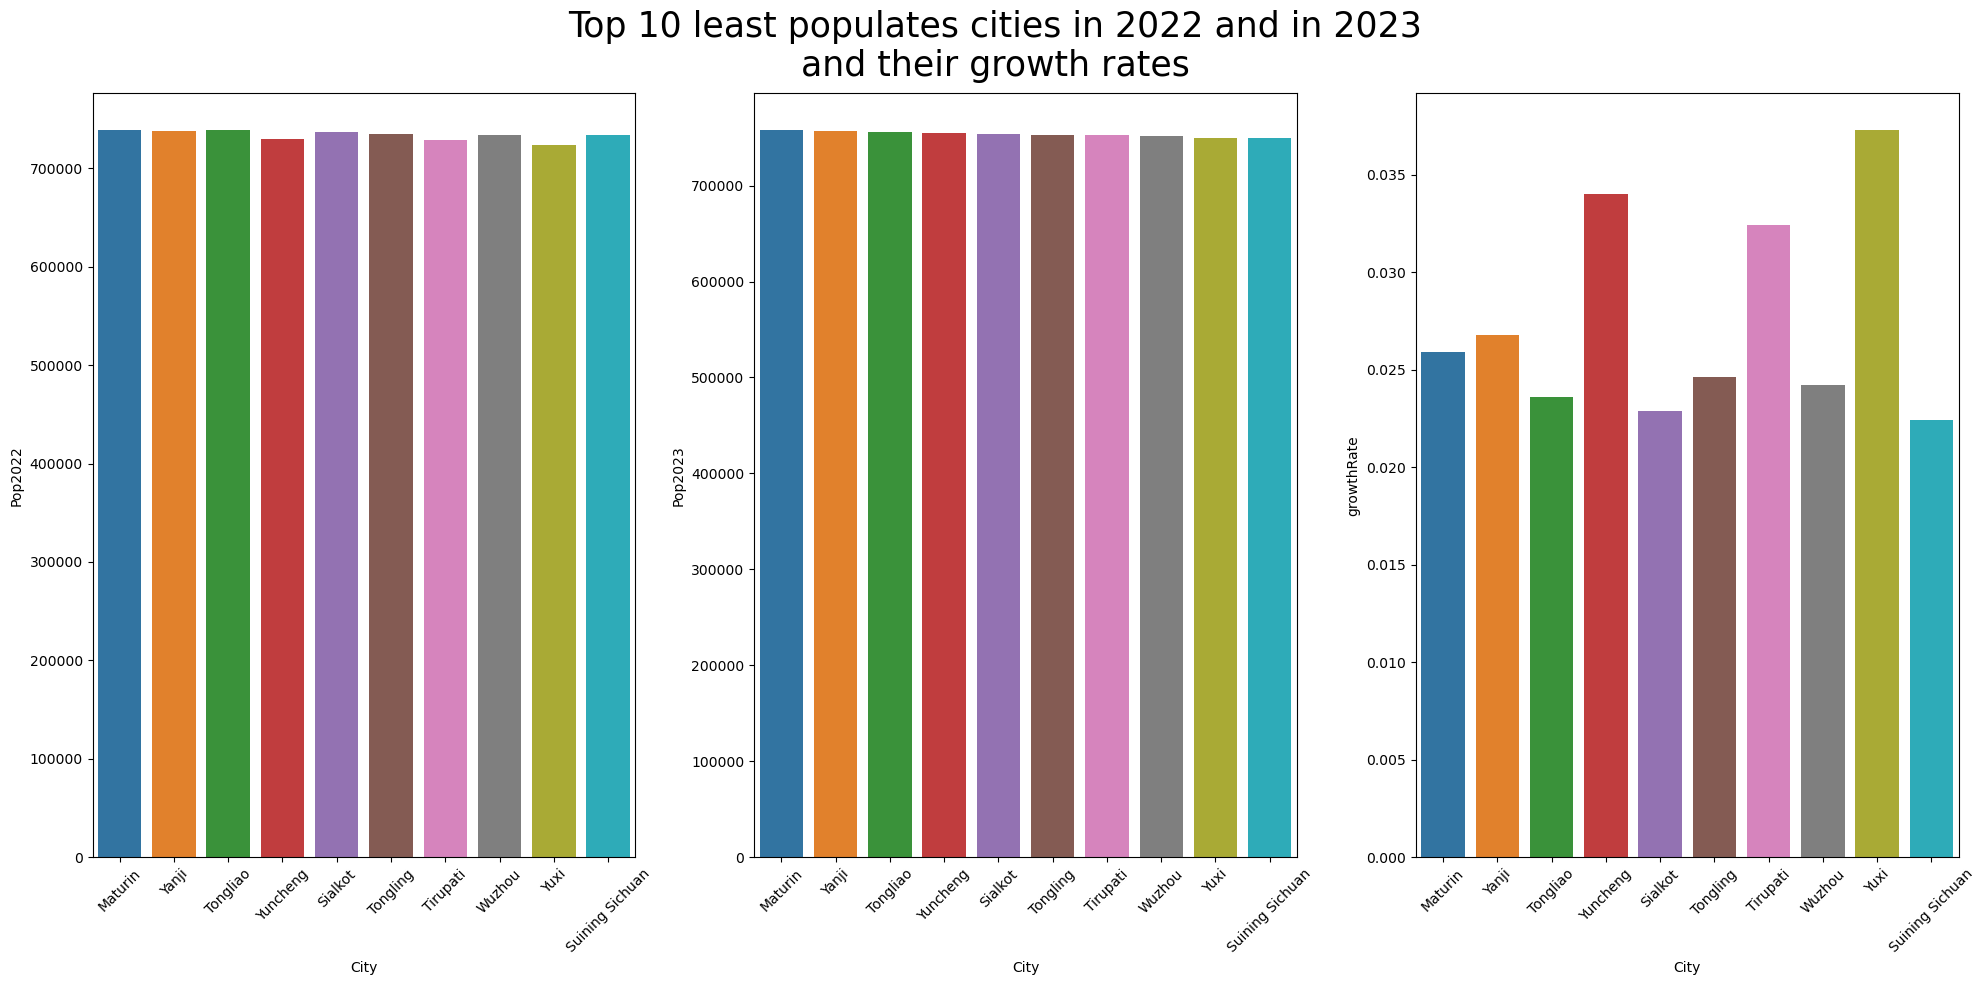

In [34]:
top_cities(10, True)

In [35]:
def top_countries(top):
    top_df = df.iloc[:top, :]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    sns.barplot(top_df,x='Country', y='Pop2022', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    sns.barplot(top_df,x='Country', y='Pop2023', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    sns.barplot(top_df,x='Country', y='growthRate', ax=axes[2])
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
    plt.suptitle("Top {} populates country in 2022 and in 2023\nand their growth rates".format(top), size=25)
    plt.tight_layout()
    plt.show()

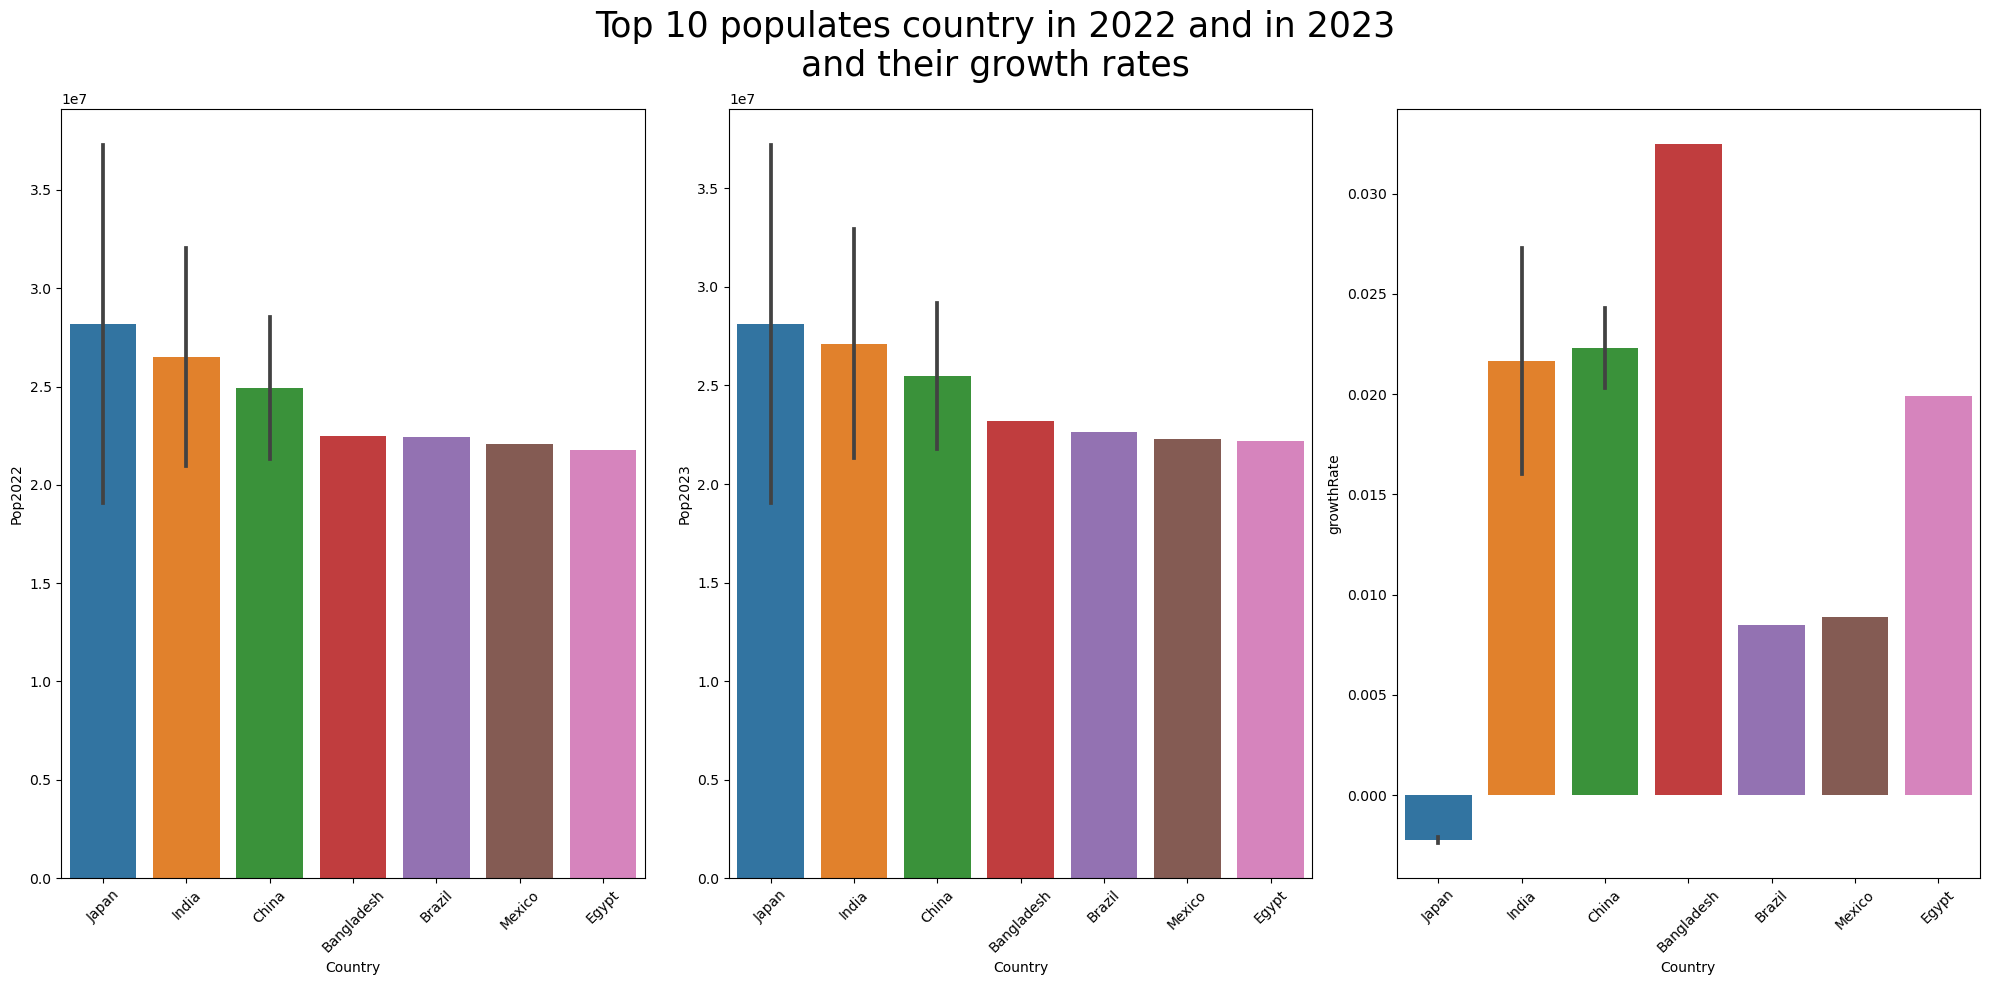

In [36]:
top_countries(10)